# Dataset Info.

### 1. train.csv

2019년 01월 01일부터 2023년 03월 03일까지의 유통된 품목의 가격 데이터 
    
#### - item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추<br>


#### - corporation : 유통 법인 코드
법인 A부터 F 존재<br>


#### - location : 지역 코드
J : 제주도 제주시
S : 제주도 서귀포시<br>


#### - supply(kg) : 유통된 물량, kg 단위
#### - price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위


### 2. international_trade.csv

관련 품목 수출입 정보(품목명, 수출 중량, 수출 금액, 수입 중량, 수입 금액, 무역 수치)


### 3. test.csv

2023년 03월 04일부터 2023년 03월 31일까지의 데이터


### 4. sample_submission.csv

제출을 위한 양식
2023년 03월 04일 ~ 2023년 03월 31일까지의 price(원/kg)을 예측
ID는 item, corperation, location으로 구성된 식별자
해당 ID에 맞춰 price(원/kg) 예측값을 answer 컬럼에 기입해야 함

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
import catboost
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss

In [10]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [11]:
data.tail()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0
59396,RD_F_J_20230303,2023-03-03,RD,F,J,427520.0,529.0


In [12]:
data['item'].value_counts()

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [13]:
data.isna().sum()

ID             0
timestamp      0
item           0
corporation    0
location       0
supply(kg)     0
price(원/kg)    0
dtype: int64

In [14]:
type(data['timestamp'][0])

str

In [15]:
import datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [16]:
type(data['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

<AxesSubplot:xlabel='item', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


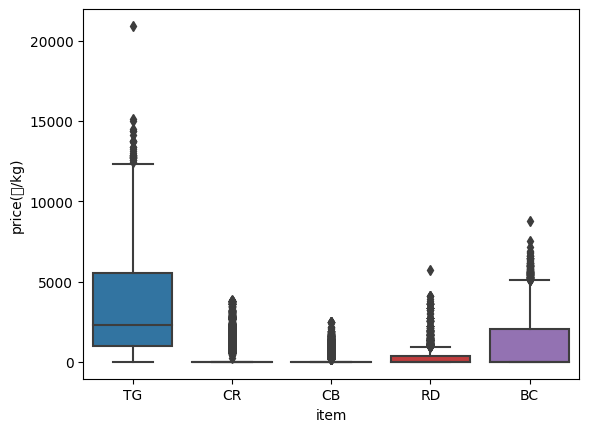

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic' # 한글 깨짐 (난 설치 안돼있음)
# 박스차트 (극단/이상/최대/제3/중앙/제1/최소)
sns.boxplot(x='item',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='corporation', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


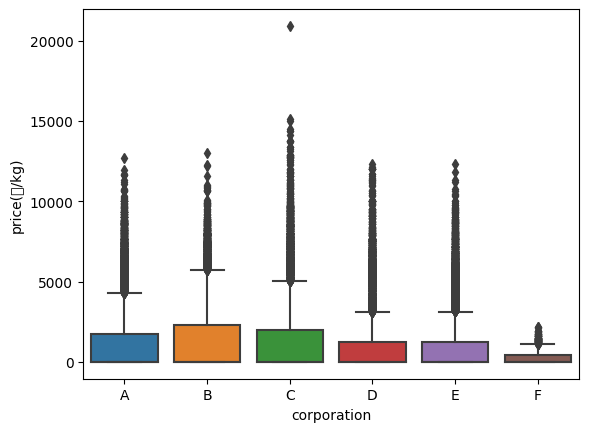

In [23]:
sns.boxplot(x='corporation',y='price(원/kg)',data=data)

<AxesSubplot:xlabel='location', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


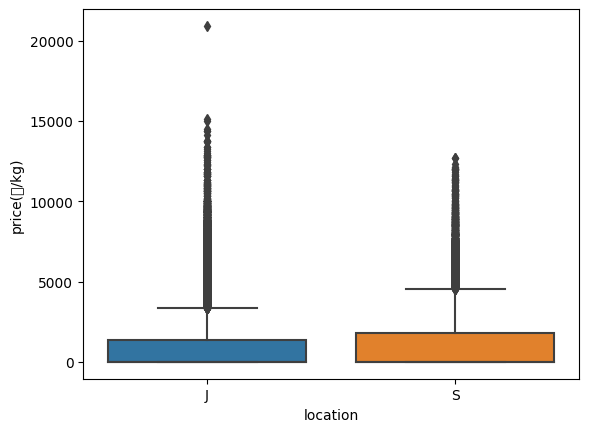

In [31]:
sns.boxplot(x='location',y='price(원/kg)', data=data)

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


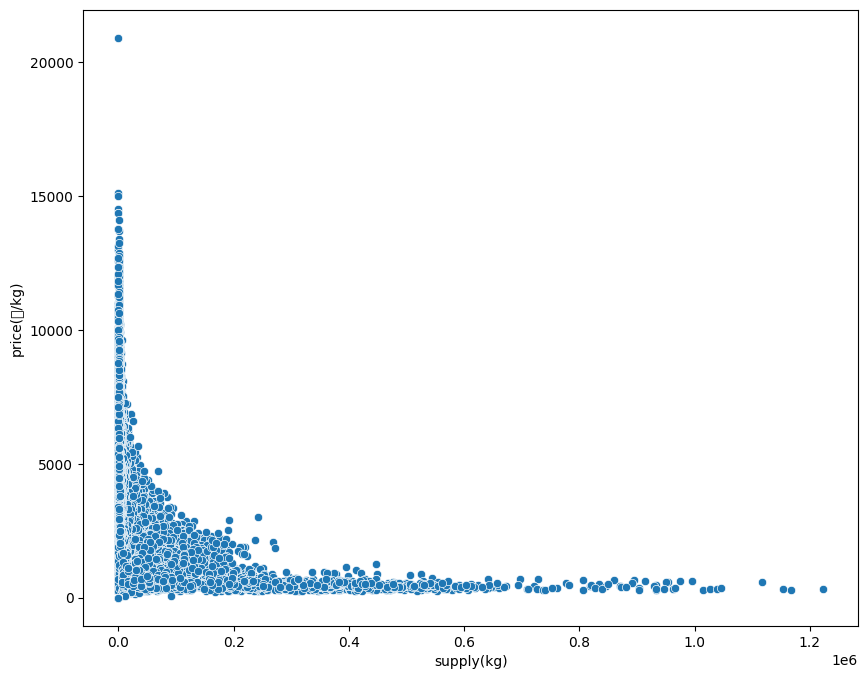

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


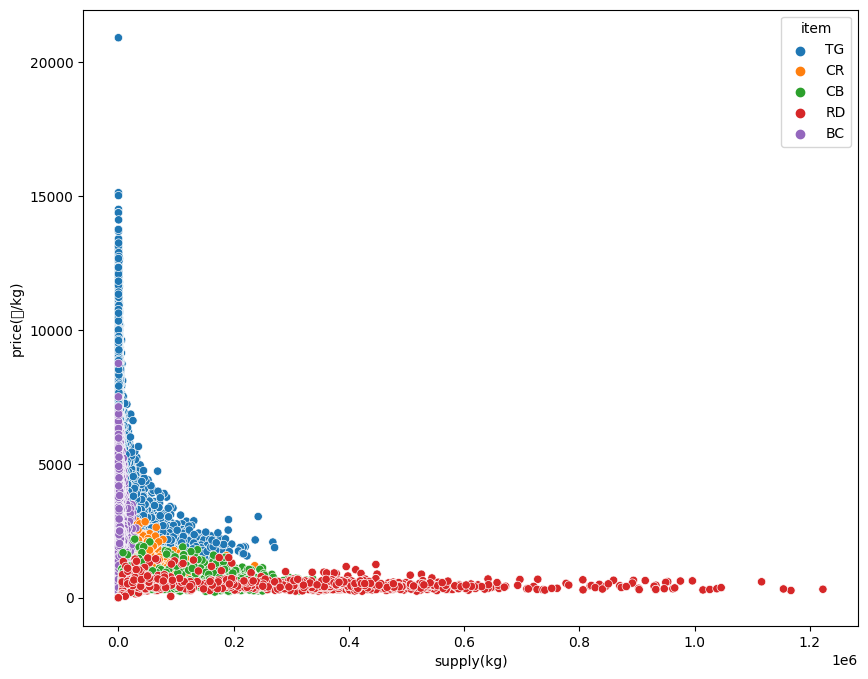

In [33]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='item')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


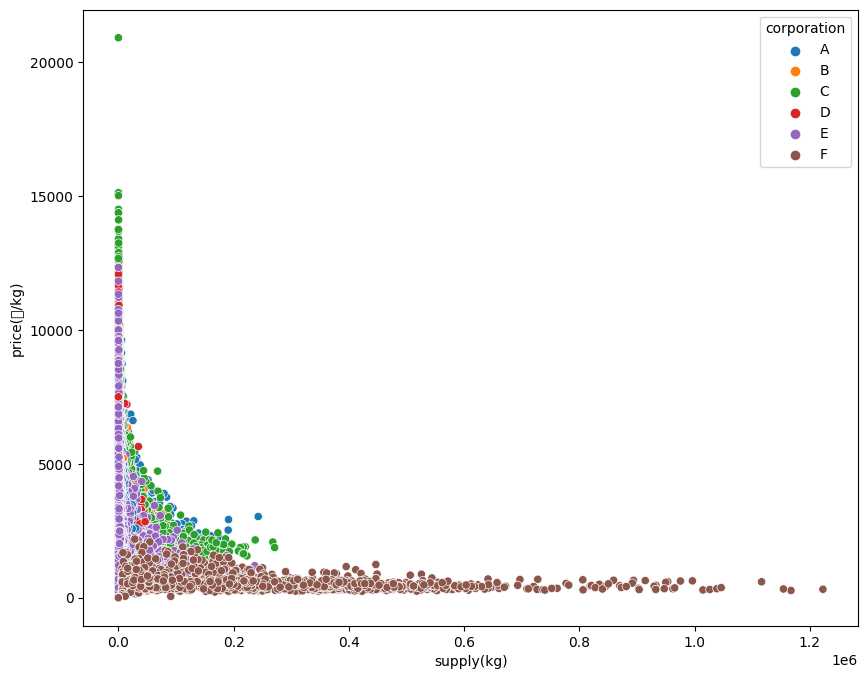

In [34]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='corporation')

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


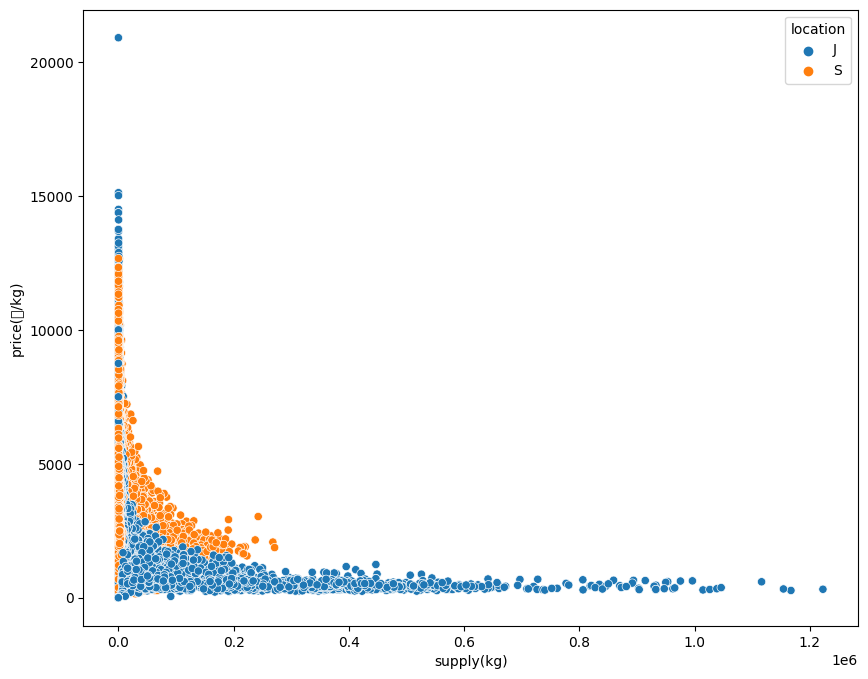

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data,x ='supply(kg)',y='price(원/kg)',hue='location')

<Figure size 1000x1000 with 0 Axes>

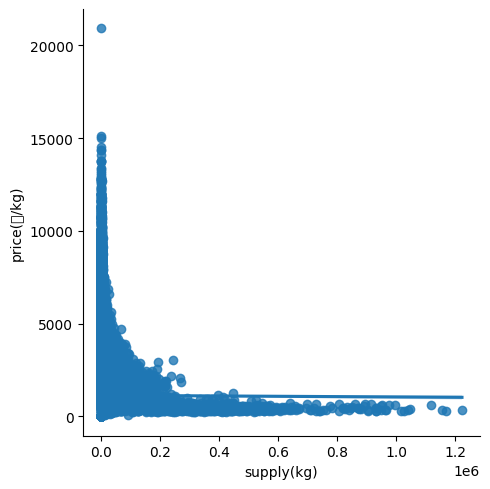

In [37]:
plt.figure(figsize=(10,10))
sns.lmplot(data=data,x ='supply(kg)',y='price(원/kg)')

In [38]:
data.groupby('item')['price(원/kg)'].sum() # BC, TG

item
BC    12476065.0
CB     1158905.0
CR     2911721.0
RD     2279304.0
TG    48392442.0
Name: price(원/kg), dtype: float64

In [39]:
data.groupby('location')['price(원/kg)'].sum() # J

location
J    37213110.0
S    30005327.0
Name: price(원/kg), dtype: float64

In [40]:
data.groupby('corporation')['price(원/kg)'].sum() # F

corporation
A    15649343.0
B    11763166.0
C    13418396.0
D    12490909.0
E    13107338.0
F      789285.0
Name: price(원/kg), dtype: float64

In [41]:
data[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


## 날짜 분리

In [45]:
# 연도/달/일 추출해서 concat
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


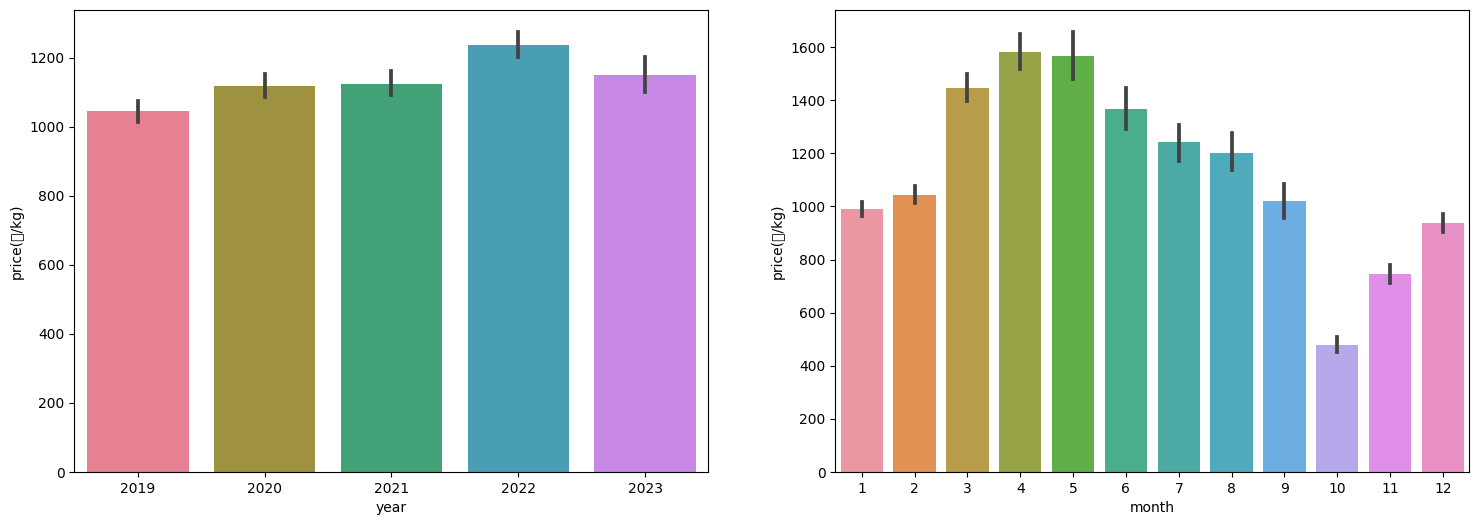

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=data,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=data,x='month',y='price(원/kg)',ax=axes[1])  # 봄

In [47]:
items = data['item'].value_counts().index.to_list()
items

['TG', 'BC', 'RD', 'CR', 'CB']

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


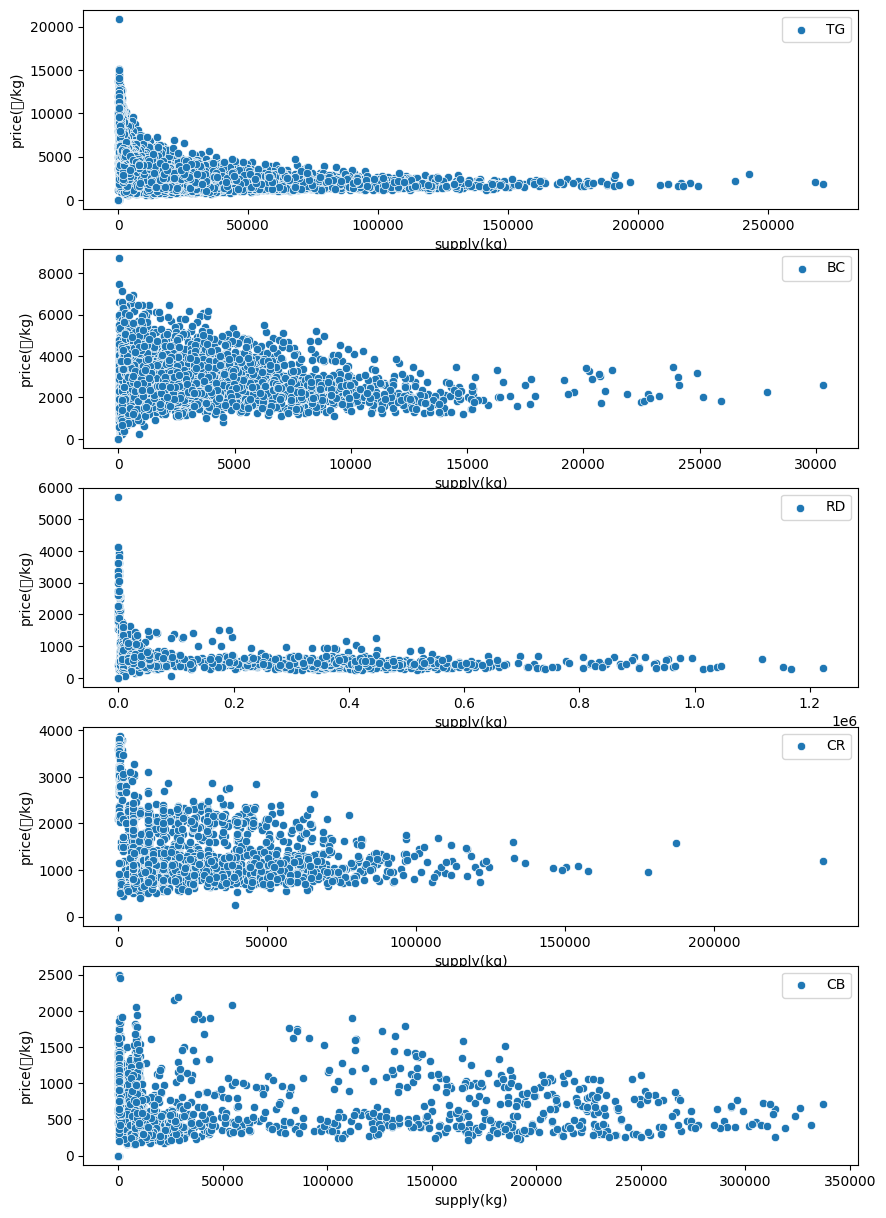

In [48]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = data[data['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

In [49]:
corp = data['corporation'].value_counts().index.to_list()
corp

['A', 'E', 'D', 'C', 'B', 'F']

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


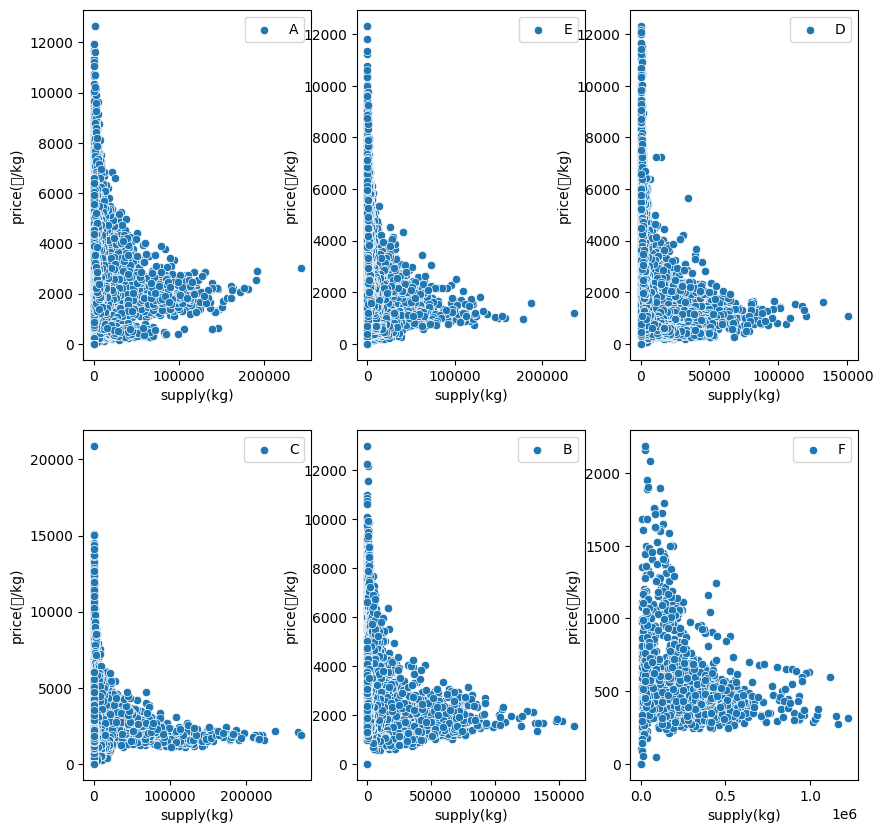

In [51]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = data[data['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])


In [52]:
loc = data['location'].value_counts().index.to_list()
loc

['J', 'S']

<AxesSubplot:xlabel='supply(kg)', ylabel='price(원/kg)'>

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


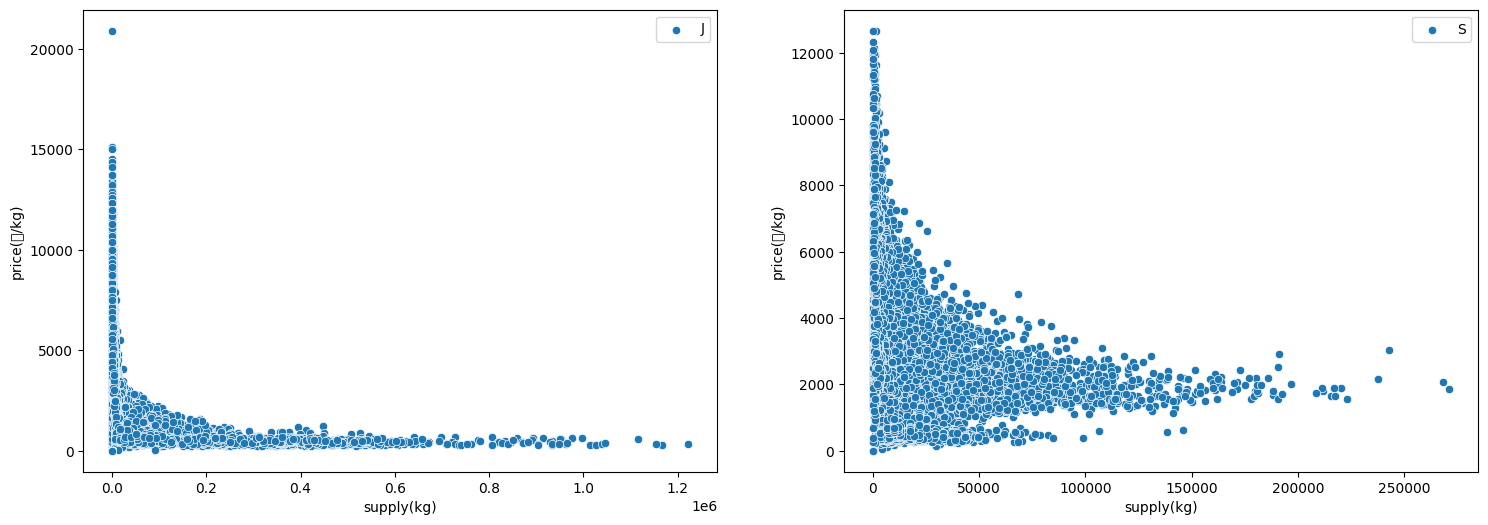

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data = data[data['location']==loc[0]], x = 'supply(kg)',y='price(원/kg)',label=loc[0],ax = axes[0])
sns.scatterplot(data = data[data['location']==loc[1]], x = 'supply(kg)',y='price(원/kg)',label=loc[1],ax = axes[1])

# supply ==0, 多

In [54]:
data[data['supply(kg)']==0]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0,2019,1,6
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0,2019,1,13
19,TG_A_J_20190120,2019-01-20,TG,A,J,0.0,0.0,2019,1,20
...,...,...,...,...,...,...,...,...,...,...
59363,RD_F_J_20230129,2023-01-29,RD,F,J,0.0,0.0,2023,1,29
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0,2023,2,5
59377,RD_F_J_20230212,2023-02-12,RD,F,J,0.0,0.0,2023,2,12
59384,RD_F_J_20230219,2023-02-19,RD,F,J,0.0,0.0,2023,2,19


In [55]:
len(data), len(data[data['supply(kg)']==0])

(59397, 35452)

In [56]:
len(data[data['supply(kg)']==0]) / len(data)

0.5968651615401451

# supply 0인경우 제외!!

In [57]:
sup_notzero = data[data['supply(kg)']!=0]
sup_notzero 

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


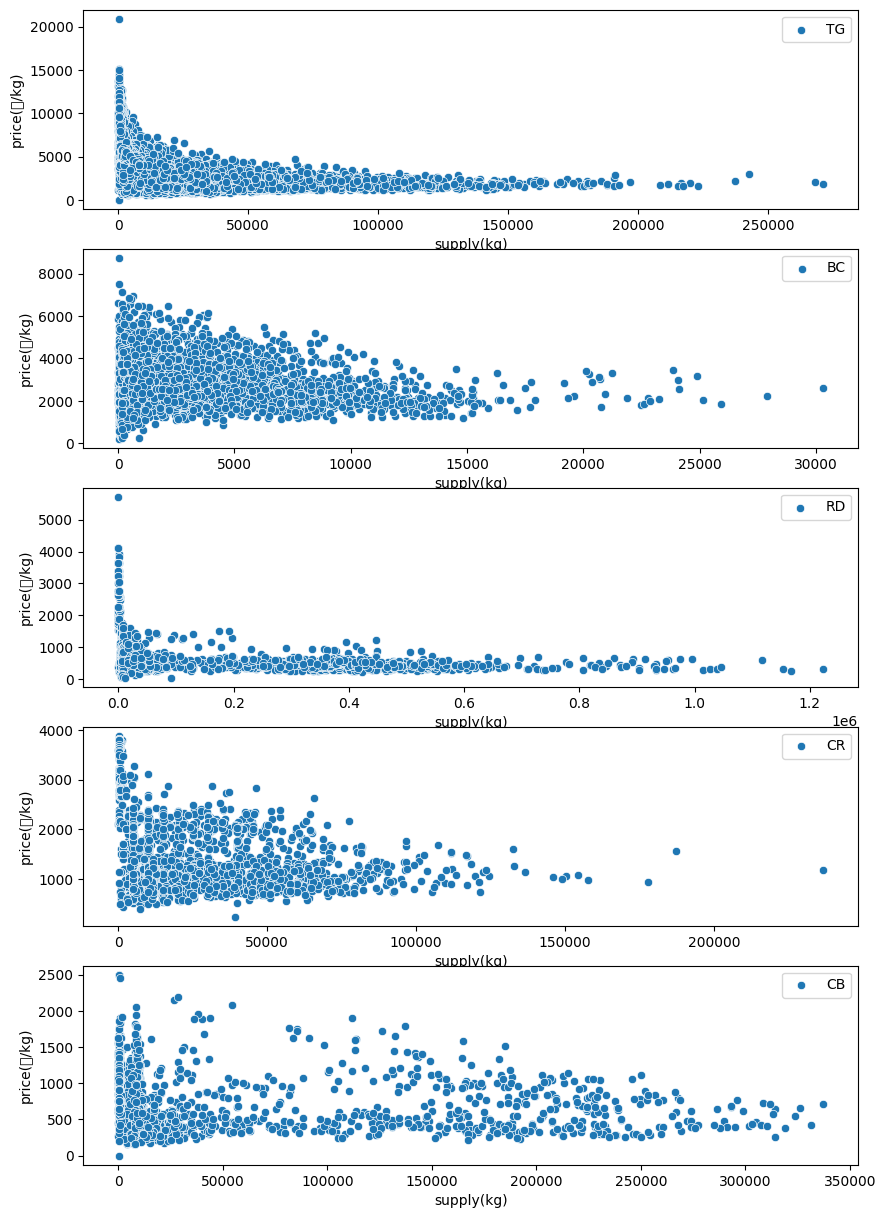

In [58]:
fig, axes = plt.subplots(5,1,figsize=(10,15))
for i in range(len(items)):
    r = i%5
    sns.scatterplot(data = sup_notzero[sup_notzero['item']==items[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[r],label=items[i])

In [59]:
data['item'].value_counts()

TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [60]:
sup_notzero['item'].value_counts()

TG    11677
BC     4525
RD     4040
CR     2082
CB     1621
Name: item, dtype: int64

 ### strftime('%Y-%m') 함수 - 날짜를 원하는 형식의 문자열(str)로 변환하는 함수

In [61]:
sup_notzero['y-m']=sup_notzero['timestamp'].dt.strftime('%Y-%m')
#  연도와 월을 'YYYY-MM' 형식의 문자열로 
sup_notzero['y-m']

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2        2019-01
3        2019-01
4        2019-01
6        2019-01
7        2019-01
          ...   
59392    2023-02
59393    2023-02
59394    2023-03
59395    2023-03
59396    2023-03
Name: y-m, Length: 23945, dtype: object

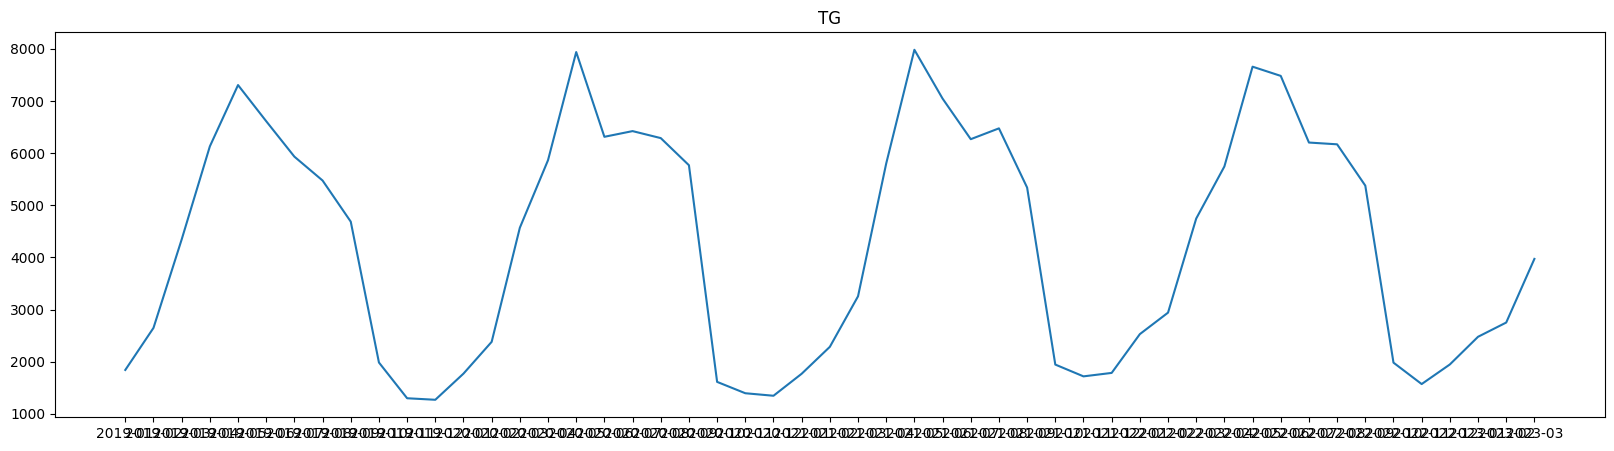

In [76]:
plt.figure(figsize=(20,5))
plt.title('TG') 
plt.plot(sup_notzero[sup_notzero['item'] == 'TG'].groupby(['y-m'])['price(원/kg)'].mean())

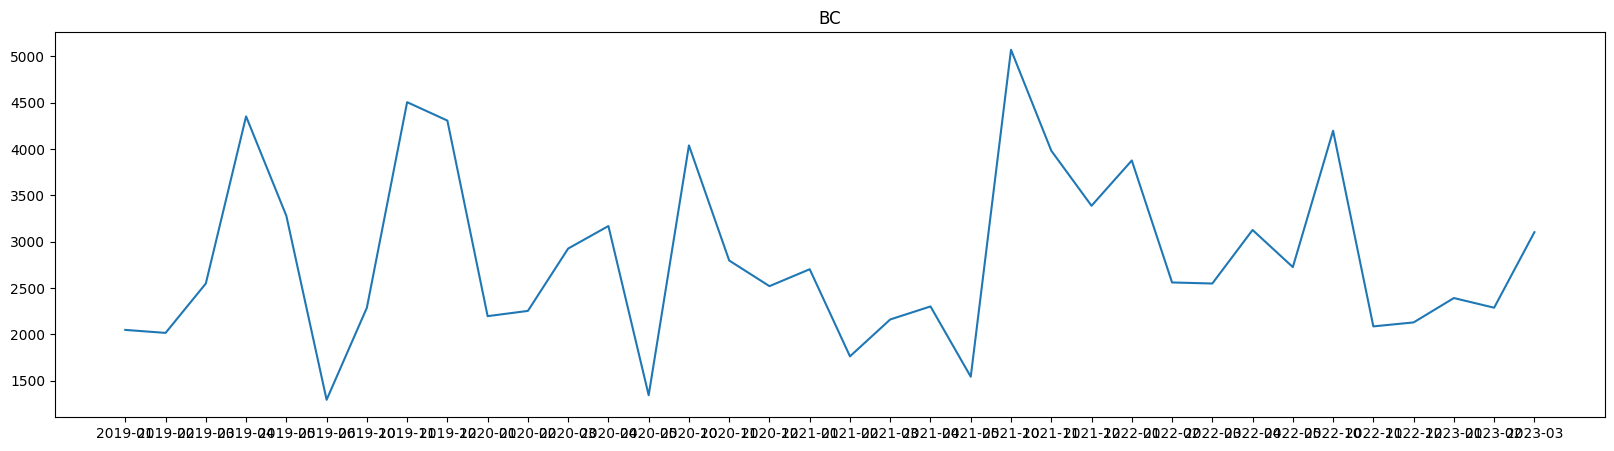

In [77]:
plt.figure(figsize=(20,5))
plt.title('BC') 
plt.plot(sup_notzero[sup_notzero['item'] == 'BC'].groupby(['y-m'])['price(원/kg)'].mean())

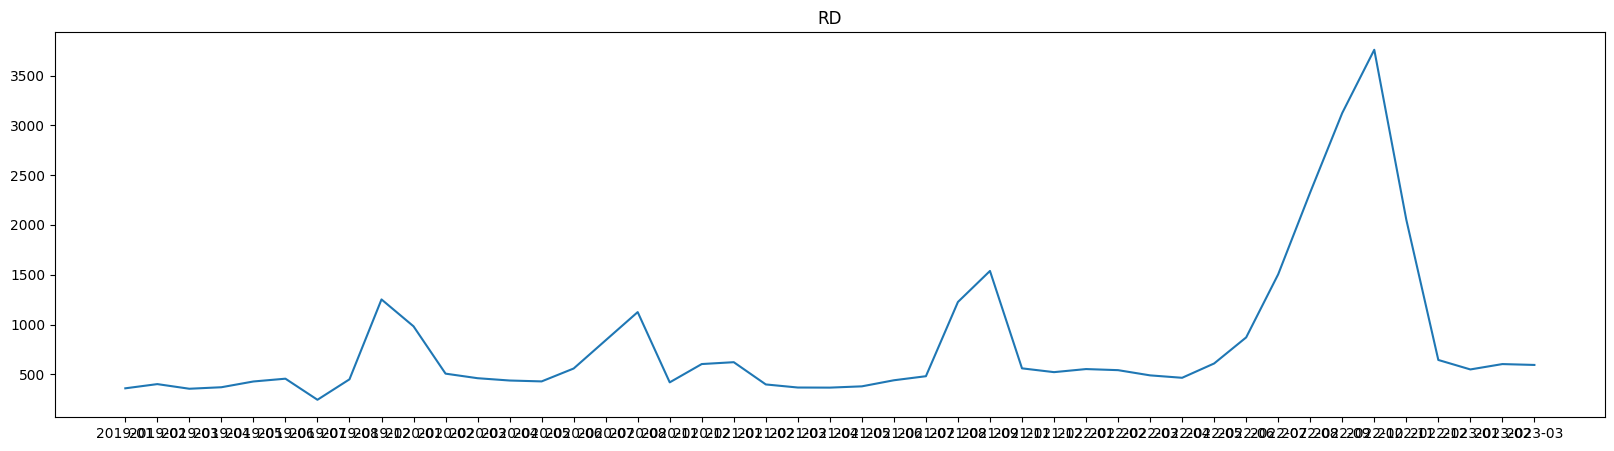

In [78]:
plt.figure(figsize=(20,5))
plt.title('RD') 
plt.plot(sup_notzero[sup_notzero['item'] == 'RD'].groupby(['y-m'])['price(원/kg)'].mean())

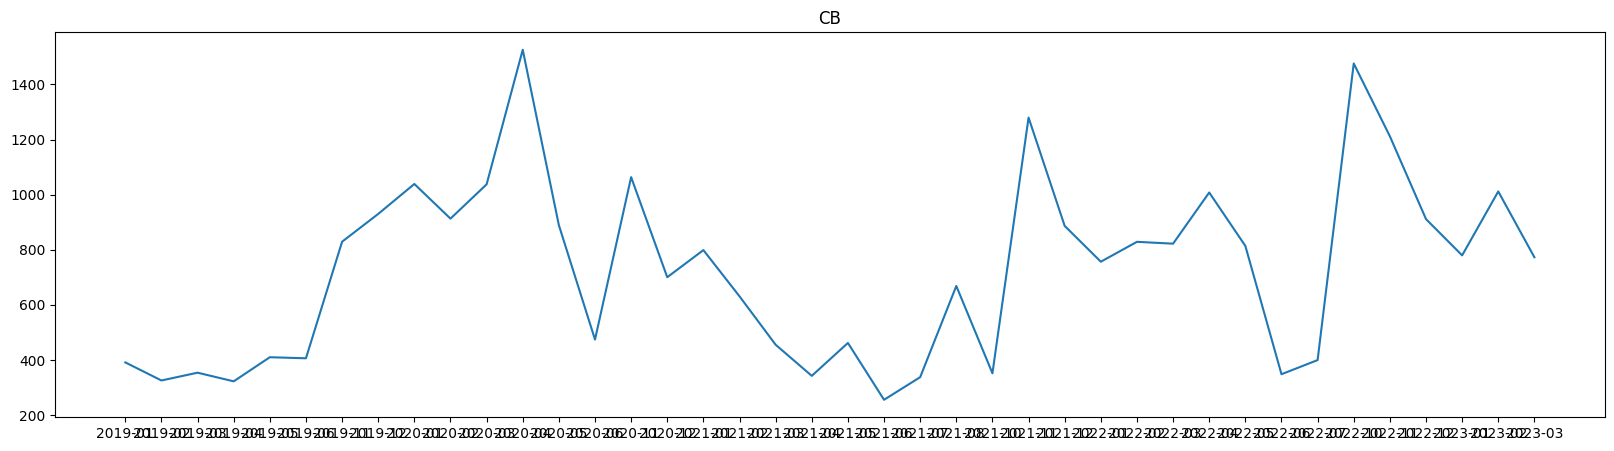

In [80]:
plt.figure(figsize=(20,5))
plt.title('CB') 
plt.plot(sup_notzero[sup_notzero['item'] == 'CB'].groupby(['y-m'])['price(원/kg)'].mean())

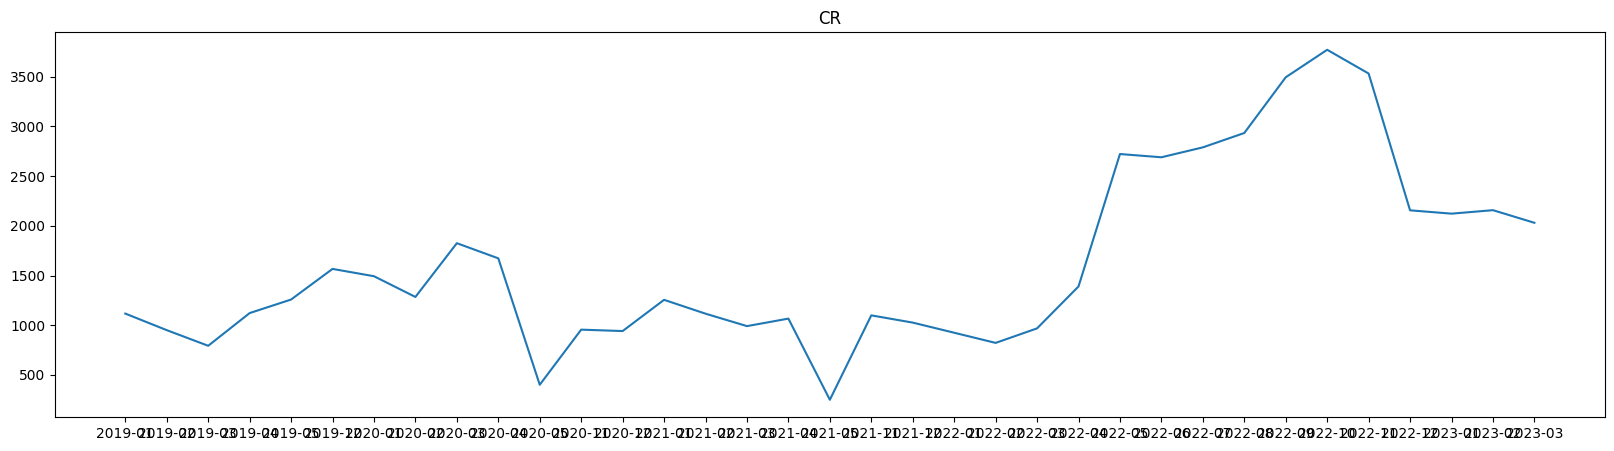

In [82]:
plt.figure(figsize=(20,5))
plt.title('CR') 
plt.plot(sup_notzero[sup_notzero['item'] == 'CR'].groupby(['y-m'])['price(원/kg)'].mean())

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'all')

C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Neuer Ordner\envs\2023_2_kaggle\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


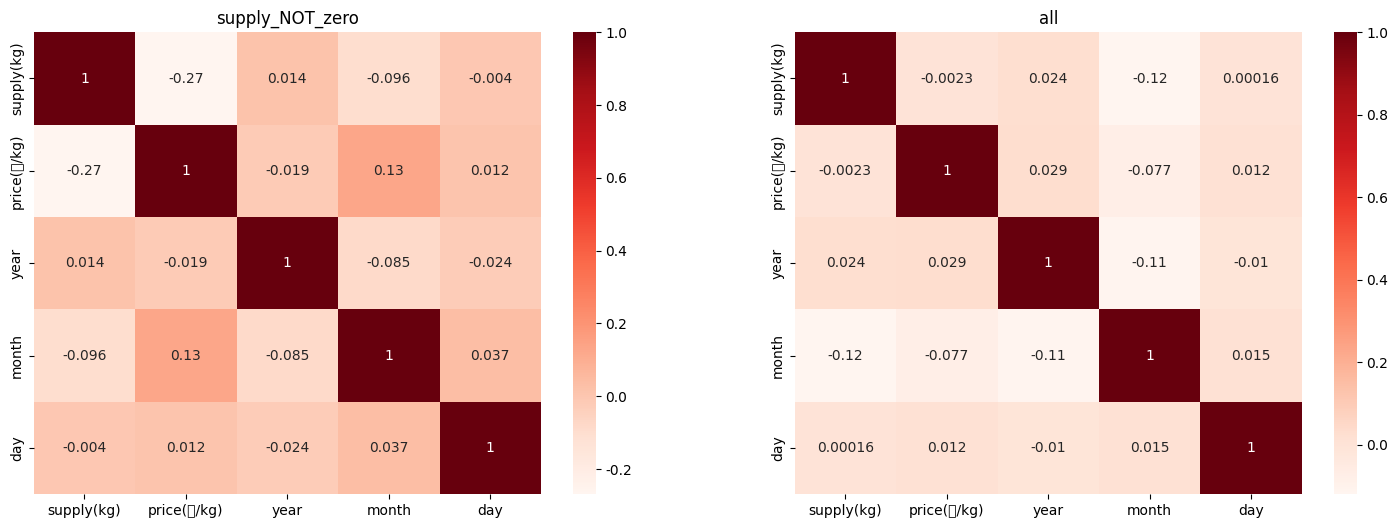

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.heatmap(sup_notzero.corr(),annot=True,cmap='Reds',ax = axes[0])  # MONTH
axes[0].set_title('supply_NOT_zero')
sns.heatmap(data.corr(),annot=True,cmap='Reds',ax = axes[1])
axes[1].set_title('all')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


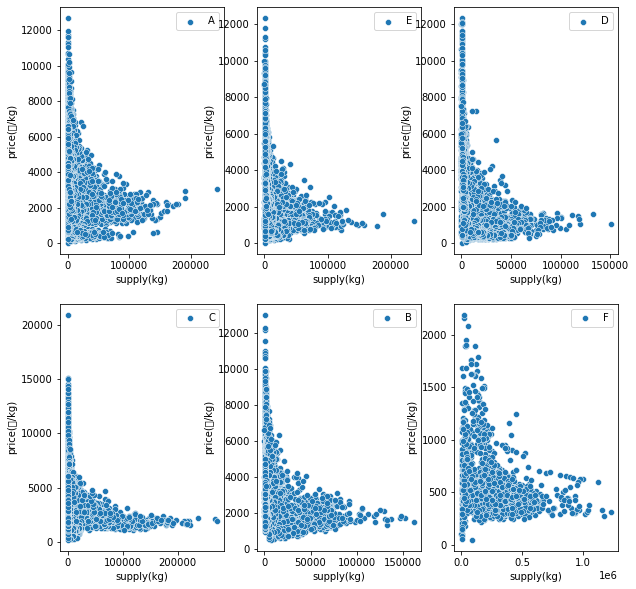

In [35]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
for i in range(len(corp)):
    n=int(i/3)
    r = i%3
    sns.scatterplot(data = sup_notzero[sup_notzero['corporation']==corp[i]], x = 'supply(kg)',y='price(원/kg)',ax=axes[n][r],label=corp[i])

<AxesSubplot:xlabel='month', ylabel='price(원/kg)'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


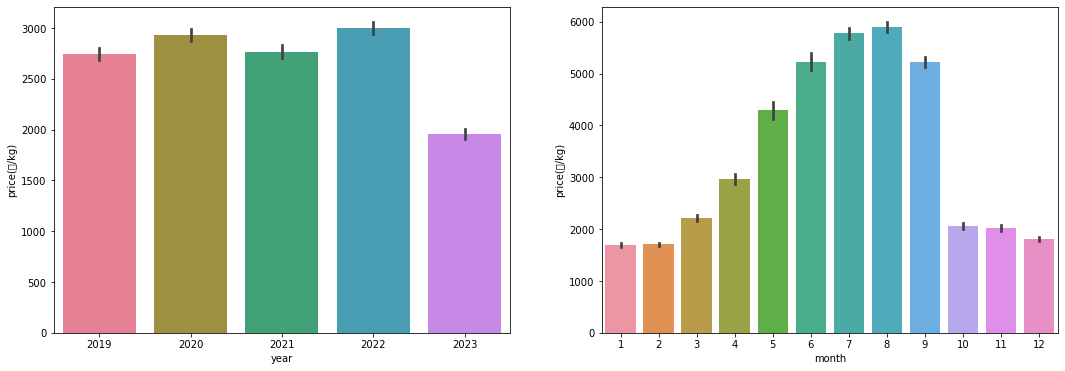

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=sup_notzero,x='year',y='price(원/kg)',ax=axes[0],palette='husl')
sns.barplot(data=sup_notzero,x='month',y='price(원/kg)',ax=axes[1]) # 여름~초가을9월

# 휴일 여부 넣어보기(1-cheaper)

In [85]:
pip install pytimekr

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7942 sha256=b9aab06068a578c300d497bdb330fab079aa99437a82006bf3584dbb389a1c10
  Stored in directory: c:\users\황의지\appdata\local\pip\cache\wheels\7d\4b\2a\fa88070a9179e47bc2a85de51d4357f8b8e44a10cbb94ad7e3
Successfully built pytimekr
Note: you may need to restart the kernel to use updated packages.


In [86]:
from pytimekr import pytimekr

In [87]:
year_2019 = pytimekr.holidays(year=2019)
year_2020 = pytimekr.holidays(year=2020)
year_2021 = pytimekr.holidays(year=2021)
year_2022 = pytimekr.holidays(year=2022)
year_2023 = pytimekr.holidays(year=2023)



def holidays(x):
    if x.weekday() in range(5,8):
        return 1
    if x.year == 2019  and x in year_2019 :
        return 1 
    elif x.year == 2020 and x in year_2020:
        return 1 
    elif x.year == 2021 and x in year_2021 :
        return 1 
    elif x.year == 2022 and x in year_2022 :
        return 1
    elif x.year == 2023 and x in year_2023:
        return 1
    else:
        return 0

In [88]:
import warnings
warnings.filterwarnings('ignore')
data['holiday'] = data['timestamp'].apply(holidays)
data

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,holiday
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,0


In [89]:
data['holiday'].value_counts()

0    40872
1    18525
Name: holiday, dtype: int64

<AxesSubplot:xlabel='location', ylabel='price(원/kg)'>

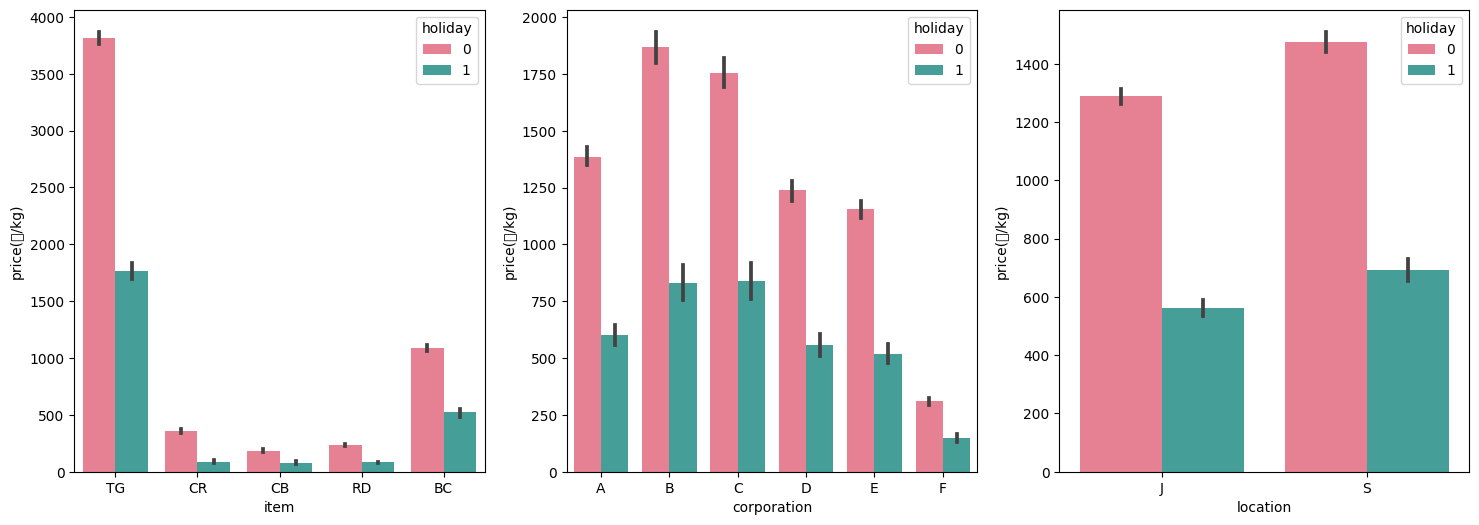

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(data=data,x='item',y='price(원/kg)',hue='holiday',ax=axes[0],palette='husl')
sns.barplot(data=data,x='corporation',y='price(원/kg)',hue='holiday',ax=axes[1],palette='husl')
sns.barplot(data=data,x='location',y='price(원/kg)',hue='holiday',ax=axes[2],palette='husl')

<AxesSubplot:>

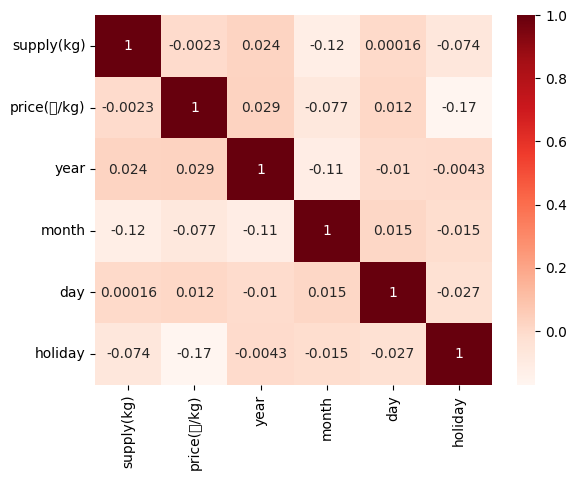

In [91]:
sns.heatmap(data.corr(),annot=True,cmap='Reds')

### Item

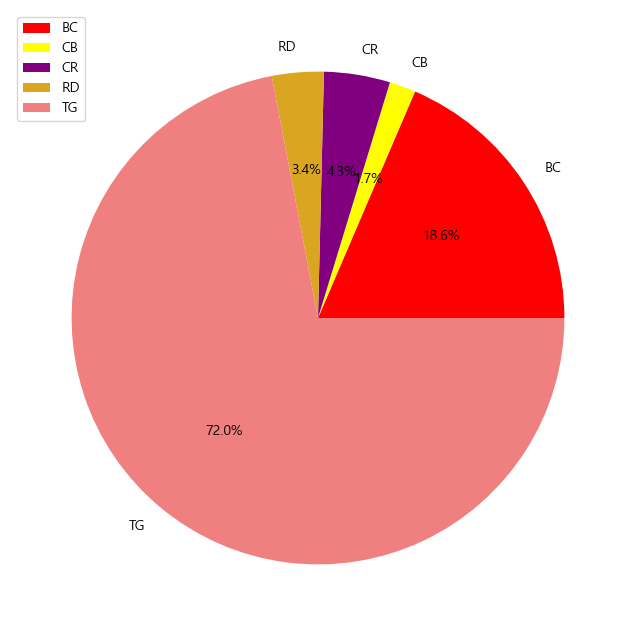

In [93]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral']
plt.rc('font',family='Malgun Gothic')
plt.pie(data = df1,x = 'price(원/kg)',labels=df1.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

### Corporation

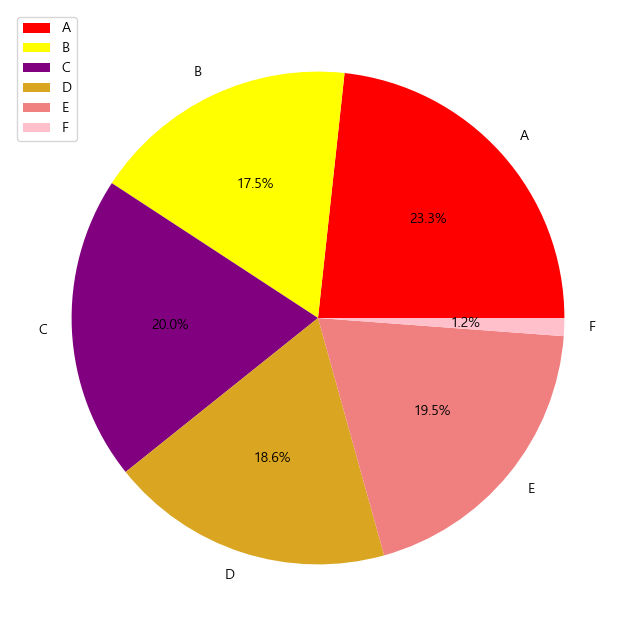

In [95]:
plt.figure(figsize=(10,8))
colors = ['red','yellow','purple','goldenrod','lightcoral','pink']
plt.rc('font',family='Malgun Gothic')
plt.pie(data = df2,x = 'price(원/kg)',labels=df2.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

### Location

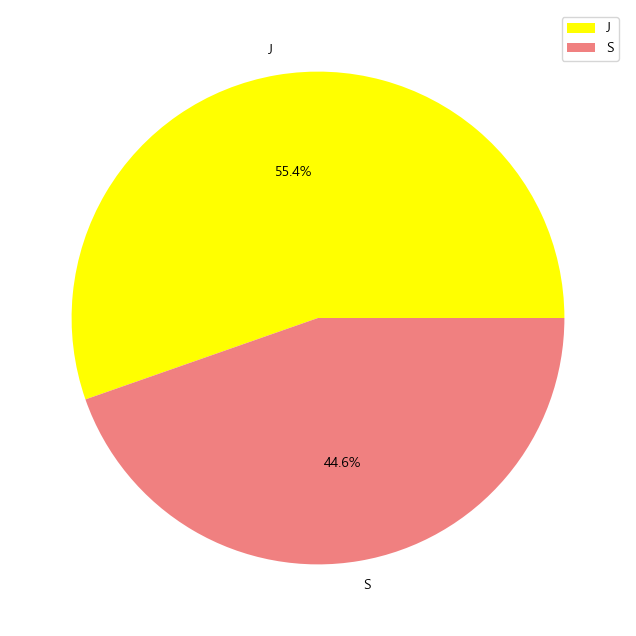

In [100]:
plt.figure(figsize=(10,8))
colors = ['yellow','lightcoral']
plt.rc('font',family='Malgun Gothic')
plt.pie(data = df3,x = 'price(원/kg)',labels=df3.index,autopct=lambda x : '{:.1f}%'.format(x),colors=colors)
plt.legend()
plt.show()

# 이상치(outlier)


<AxesSubplot:ylabel='price(원/kg)'>

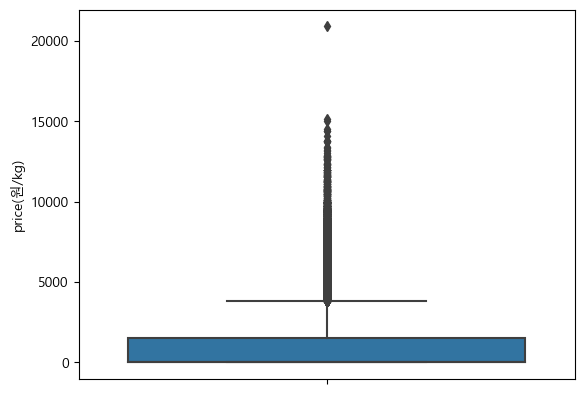

In [101]:
sns.boxplot(y='price(원/kg)',data=data)

<AxesSubplot:ylabel='price(원/kg)'>

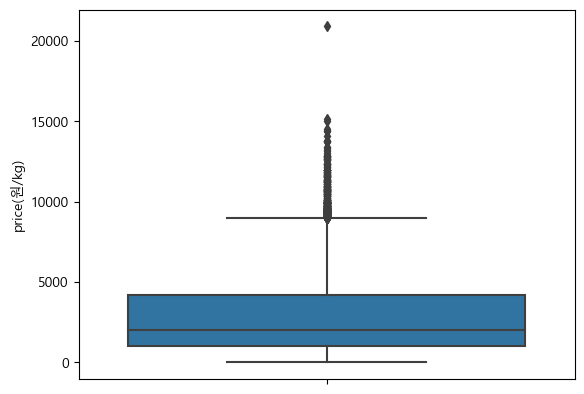

In [102]:
sns.boxplot(y='price(원/kg)',data=sup_notzero)

#### 이상치 제거

In [106]:
# 이상치제거함수
from collections import Counter
import numpy as np
def outlier(df,n,cols):
    outs = []
    for col in cols :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        step = 1.5*IQR
        indexes = df[(df[col] < Q1 - step)|(df[col] > Q3 + step)].index
        outs.extend(indexes)
    outs = Counter(outs)
    res = [k for k,v in outs.items() if v > n]
    return res

In [107]:
outlier_col = ['supply(kg)','price(원/kg)']
outlier(data,2,outlier_col)

[]

In [108]:
outlier(sup_notzero,2,outlier_col)

[]

In [109]:
data['supply(kg)'].value_counts()

0.0         35452
4300.0        181
8600.0         85
8620.0         84
200.0          83
            ...  
13289.0         1
11706.0         1
13522.0         1
17693.0         1
427520.0        1
Name: supply(kg), Length: 12521, dtype: int64